# Red usando kera red densa 

In [1]:
#
import tensorflow as tf


In [2]:
import tensorflow_datasets as tfds

In [3]:
#Explicación del codigo
#tsds cargas la libera para los dataset de tensorflow
#mnist es dataset de los digitos
#as_supervised entrega el dataset en formato de tupla (input, label)= (imagen, etiqueta)
#en caso de fuera face los datos se entregan como diccionario {'image': imagen, 'label': etiqueta}
#with_info=True es informacion del dataset 
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)


In [5]:
datos

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [6]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\gerar\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={

In [4]:
#divicion de datos 
datosEntrenamiento, datosPruebas = datos['train'], datos['test']

In [5]:
#Para que la red funcione mejor es necesario normalizar pasar los datos 0-255 a 0-1
def normalizar (imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255
    return imagenes, etiquetas

In [6]:
datosEntrenamiento = datosEntrenamiento.map(normalizar)
datosPruebas = datosPruebas.map(normalizar)

datosEntrenamiento = datosEntrenamiento.cache()
datosPruebas = datosPruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

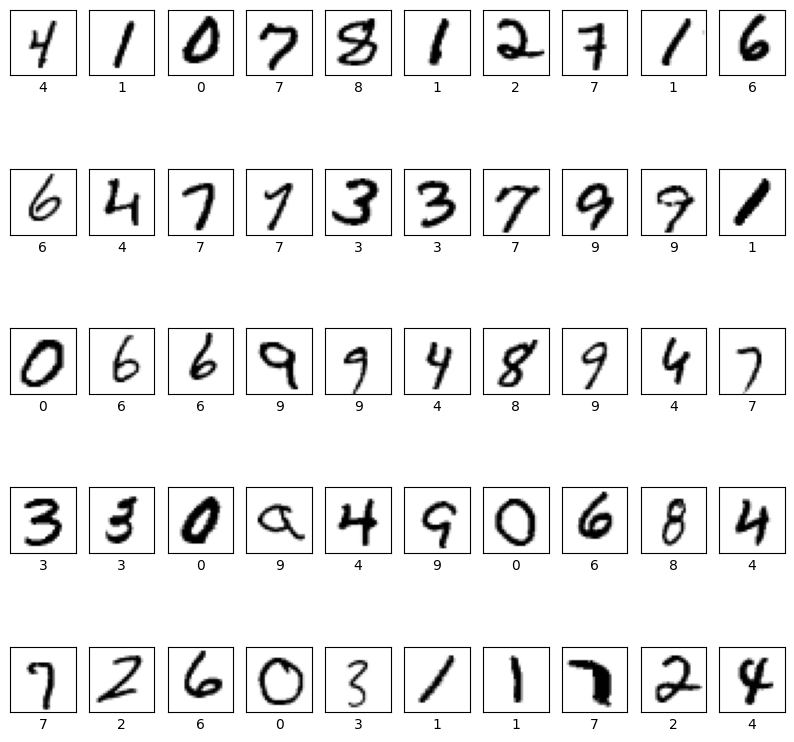

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datosEntrenamiento.take(50)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(clases[etiqueta])

plt.show()  

In [8]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datosEntrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datosPruebas.batch(TAMANO_LOTE)

In [11]:
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9574 - loss: 0.1398
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9861 - loss: 0.0445
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9896 - loss: 0.0321
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9924 - loss: 0.0246
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9944 - loss: 0.0174
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9960 - loss: 0.0111
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9969 - loss: 0.0093
Epoch 9/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9974 - loss: 0.0076
Epoch 10/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9978 - loss: 0.0071
Epoch 11/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9976 - loss: 0.0069
Epoch 12/60
1875/18

In [24]:
pip install tensorflowjs

     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     -------------------------------------  14.9/15.2 MB 104.1 MB/s eta 0:00:01
     -------------------------------------  14.9/15.2 MB 104.1 MB/s eta 0:00:01
     ---------------------------------------- 15.2/15.2 MB 34.0 MB/s  0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipykernel 7.1.0 requires packaging>=22, but you have packaging 20.9 which is incompatible.
jupyterlab-server 2.28.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
jupyter-server 2.17.0 requires packaging>=22.0, but you have packaging 20.9 which is incompatible.
scikit-image 0.25.2 requires packaging>=21, but you have packaging 20.9 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import tensorflow as tf

# 1. Configurar el convertidor usando tu modelo Keras existente
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

# 2. Aplicar optimizaciones (Recomendado para web: hace el modelo más ligero y rápido)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 3. Convertir el modelo a formato binario (tflite)
tflite_model = converter.convert()

# 4. Guardar el archivo .tflite en tu carpeta
NOMBRE_ARCHIVO = 'modelo_numeros.tflite'

with open(NOMBRE_ARCHIVO, 'wb') as f:
    f.write(tflite_model)

print(f"¡Listo! Tu modelo se guardó como '{NOMBRE_ARCHIVO}'.")
print("Ahora puedes usar este archivo único con la librería de LiteRT en JavaScript.")

INFO:tensorflow:Assets written to: C:\Users\gerar\AppData\Local\Temp\tmpelqapgfp\assets


INFO:tensorflow:Assets written to: C:\Users\gerar\AppData\Local\Temp\tmpelqapgfp\assets


Saved artifact at 'C:\Users\gerar\AppData\Local\Temp\tmpelqapgfp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2125057767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2125057764688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2125057760080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2125057765456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2125057768144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2125057768912: TensorSpec(shape=(), dtype=tf.resource, name=None)
¡Listo! Tu modelo se guardó como 'modelo_numeros.tflite'.
Ahora puedes usar este archivo único con la librería de LiteRT en JavaScript.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


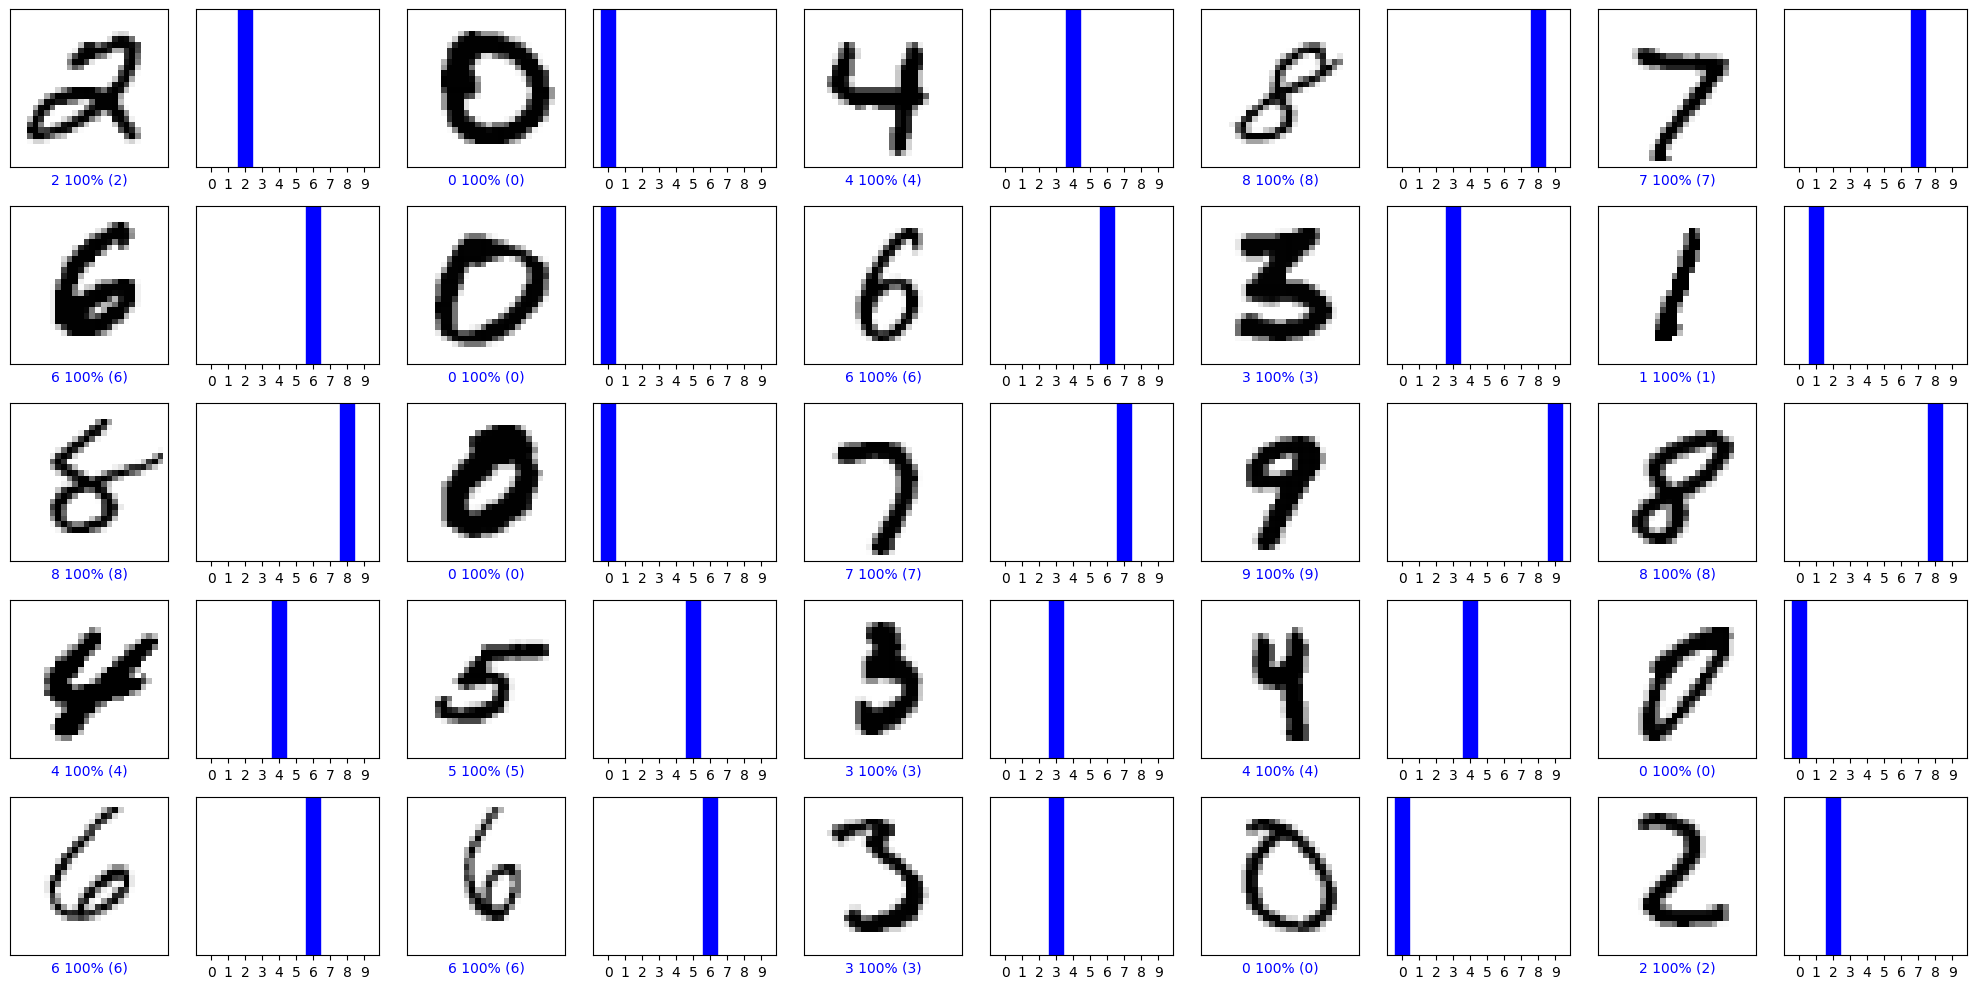

In [12]:
import numpy as np
import matplotlib.pyplot as plt

nombres_clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# 2. Obtener un lote de imágenes de prueba
# IMPORTANTE: datos_pruebas debe tener .batch(32) aplicado previamente
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

# Función para graficar la imagen con su etiqueta predicha
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # img[...,0] es necesario si la imagen tiene forma (28, 28, 1)
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue' # Predicción correcta
    else:
        color = 'red'  # Predicción incorrecta

    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

# Función para graficar la barra de probabilidades
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks(range(10)) # Mostrar los números 0-9 en el eje X
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

# 3. Generar la cuadrícula de 5x5 imágenes (Total 25)
filas = 5
columnas = 5
num_imagenes = filas * columnas

plt.figure(figsize=(2 * 2 * columnas, 2 * filas))

for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()